# Unsupervised Learning in Python

## Chapter 4

In [52]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, coo_matrix
from sklearn.preprocessing import normalize, Normalizer, MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [37]:
wiki_articles = pd.read_csv("wikipedia-vectors.csv")
wiki_vectors = wiki_articles.drop(columns=["Unnamed: 0"]).copy()
# print(wiki_articles)

articles = csr_matrix(wiki_vectors.transpose())
titles = list(wiki_vectors.columns)

In [4]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
# print(nmf_features.round(2))

In [6]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc["Anne Hathaway"])

# Print the row for 'Denzel Washington'
print(df.loc["Denzel Washington"])

0    0.003815
1    0.000000
2    0.000000
3    0.571884
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419577
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. Is feature 3 related to acting?

In [11]:
feat = np.array([[1.,  0.5, 0. ], [0.2, 0.1, 2.1]])

sam = np.array([2, 1])

recon = np.matmul(sam, feat)

recon

array([2.2, 1.1, 2.1])

In [14]:
model.components_.shape

(6, 13125)

In [17]:
with open("wikipedia-vocabulary-utf8.txt", "r") as f_wiki_words:
    
    data = f_wiki_words.read()
    
words = data.split("\n")

len(words)

13125

In [20]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.632085
award      0.254826
starred    0.246928
role       0.212868
actress    0.187646
Name: 3, dtype: float64


Recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

In [29]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc["Cristiano Ronaldo"]

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


The Wikipedia articles that have similarity with Cristiano Ronaldo

In [22]:
samples = pd.read_csv("lcd-digits.csv", header=None).values
samples.shape

(100, 104)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


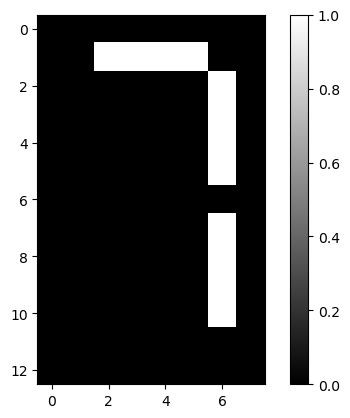

In [23]:
# Select the 0th row: digit
digit = samples[0, :]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [24]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

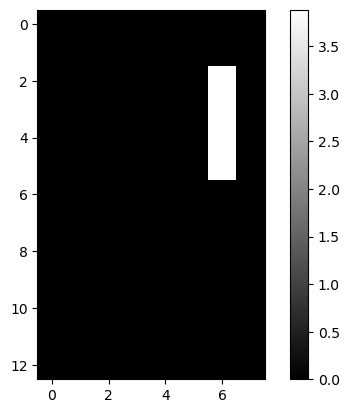

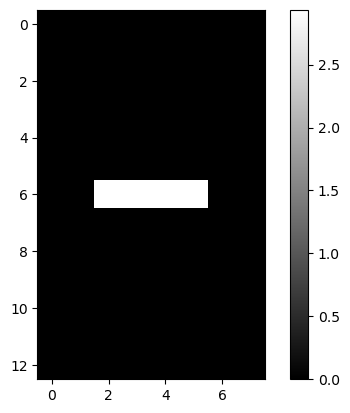

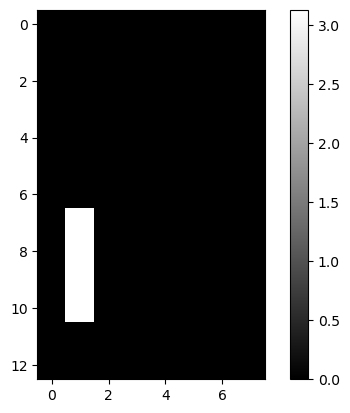

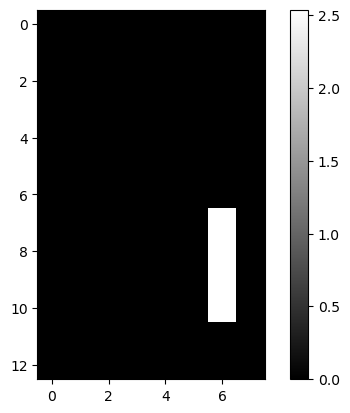

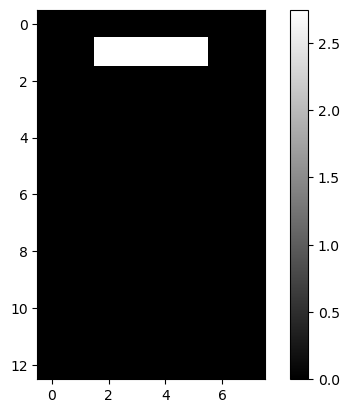

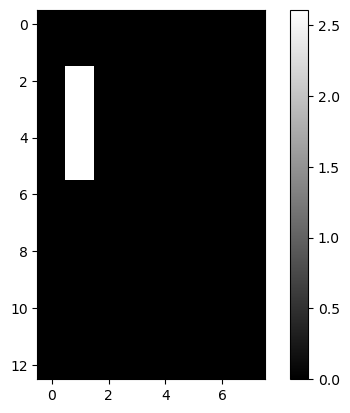

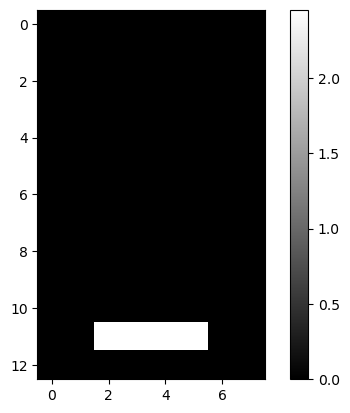

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281573e-14]


In [25]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

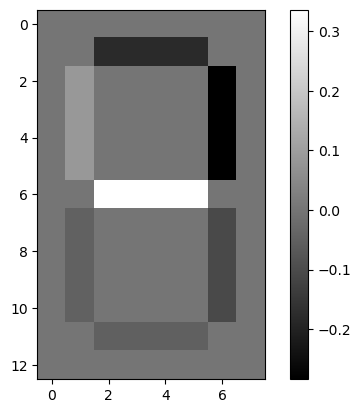

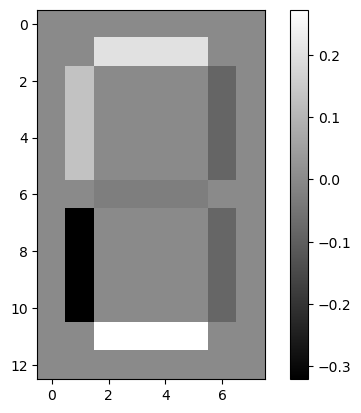

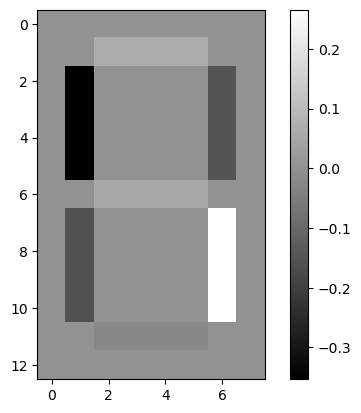

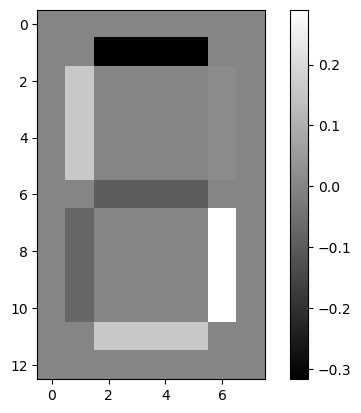

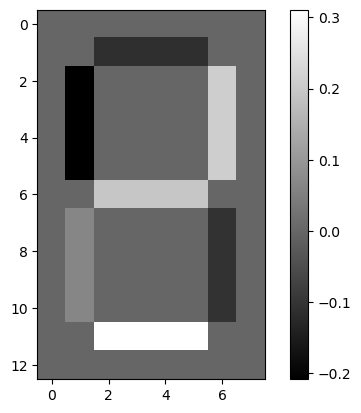

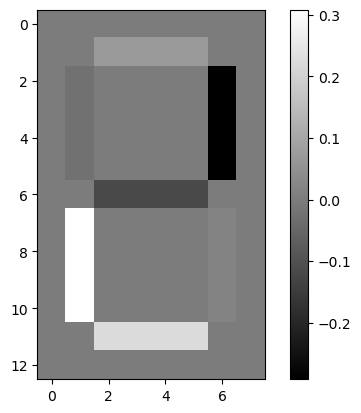

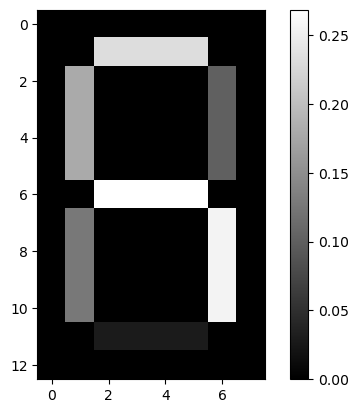

In [27]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

 The components of PCA do not represent meaningful parts of images of LED digits!

In [57]:
df_artists = pd.read_csv("scrobbler-small-sample.csv").sort_values(["artist_offset", "user_offset"], ascending=[True, True]).reset_index(drop=True)
df_artists

,user_offset,artist_offset,playcount
0,2,0,105
1,15,0,165
2,20,0,91
3,21,0,98
4,29,0,120
...,...,...,...
2889,433,110,388
2890,460,110,66
2891,463,110,105
2892,465,110,128


In [65]:
arr_artist_offset =  np.array(df_artists["artist_offset"])
arr_user_offset = np.array(df_artists["user_offset"])
arr_playcount = np.array(df_artists["playcount"])

print(arr_artist_offset.shape)
print(arr_user_offset.shape)
print(arr_playcount.shape)

(2894,)
(2894,)
(2894,)


In [66]:
artists = coo_matrix((arr_playcount, (arr_artist_offset, arr_user_offset)))
artists

<111x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2894 stored elements in COOrdinate format>

In [74]:
df_artist_names = pd.read_csv("artists.csv", header=None)
df_artist_names

,0
0,Massive Attack
1,Sublime
2,Beastie Boys
3,Neil Young
4,Dead Kennedys
...,...
106,Franz Ferdinand
107,The Postal Service
108,The Dresden Dolls
109,The Killers


In [76]:
artist_names = df_artist_names[0].tolist()
# artist_names

In [67]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [77]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Leonard Cohen        0.958706
Neil Young           0.947329
The Beach Boys       0.857976
Van Morrison         0.826908
dtype: float64
